In [234]:


#import pandas library for read.csv
import pandas as pd 
import matplotlib.pyplot as plt

#create bar chart
import seaborn as sns




#Machine learning algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV




In [235]:
data = pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
#Data Exploration
#Summary statistics 

print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [237]:
#No. of rows and columns 
data.shape

(7043, 21)

In [238]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [239]:
#Data Cleaning
#Check for any missing values 
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [240]:
data.duplicated().sum()

0

In [241]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [242]:
#remove the customerID column as it doesnt contribute valuable information 
del data['customerID']

In [243]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [244]:
#convert total charges  to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [245]:
print(data['TotalCharges'].dtype) #has been converted to float

float64


In [246]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [247]:
data.isnull().sum() #Check again to see if there are any missing values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [248]:
data.dropna(subset=['TotalCharges'], inplace = True)
print(data)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [249]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [250]:
#Convert senior citizen values
data["SeniorCitizen"] = data["SeniorCitizen"].replace(1, "Yes")
data["SeniorCitizen"] = data["SeniorCitizen"].replace(0, "No")

In [251]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


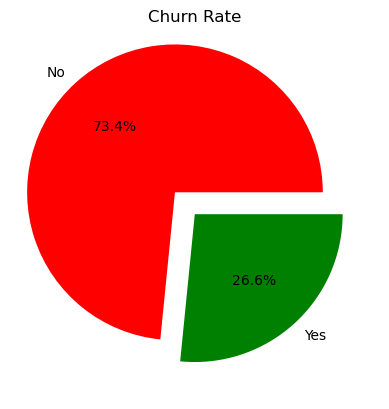

In [252]:
#Overall churn rate 
churn = data['Churn'].value_counts()
pie_explode = [0.2, 0]
mycolors = ["red", "green"]

plt.pie(churn.values, labels = churn.index, autopct="%1.1f%%", explode = pie_explode, colors = mycolors )

plt.title("Churn Rate")
plt.show()


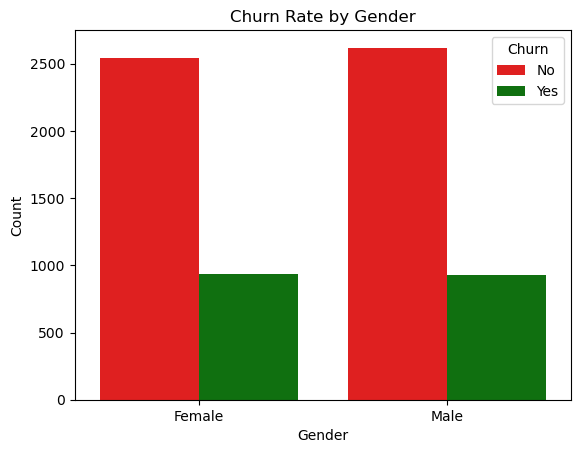

In [253]:
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "gender", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

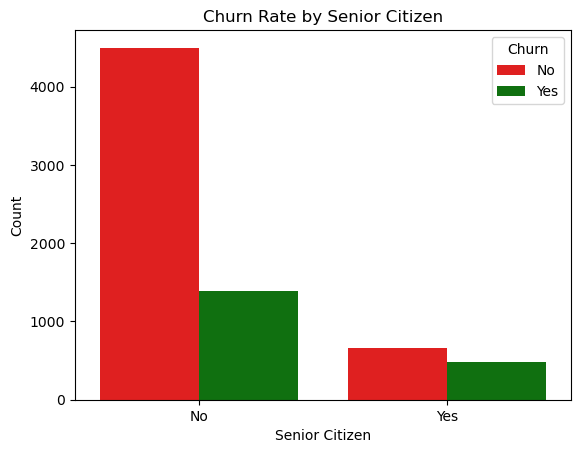

In [254]:
#Create bar chart for seniorCitizen and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "SeniorCitizen", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

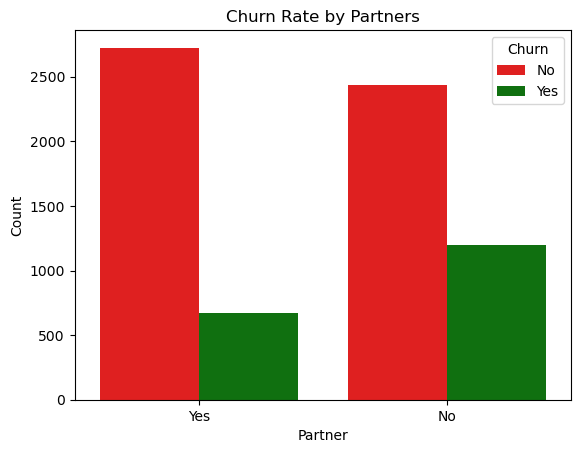

In [255]:
#Create bar chart for Partners and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Partner", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Partners")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

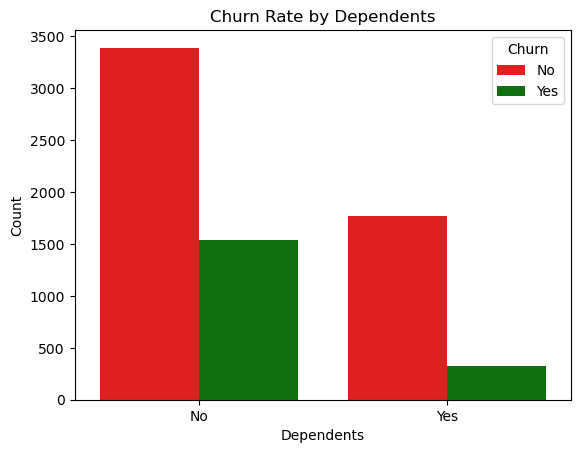

In [256]:
#Create bar chart for Dependents and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Dependents", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

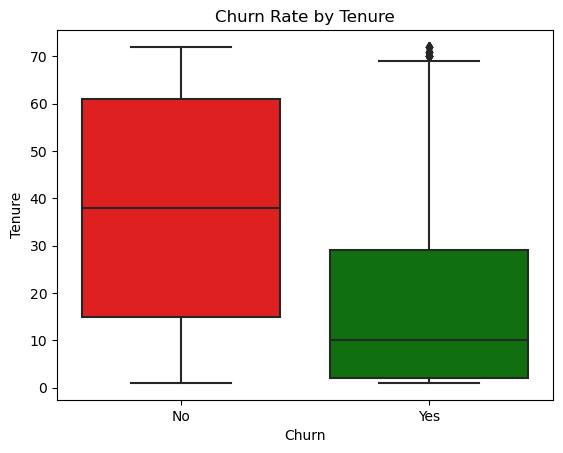

In [257]:
#Create bar chart for tenure and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "tenure", data = data, palette = custom_palette)

plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

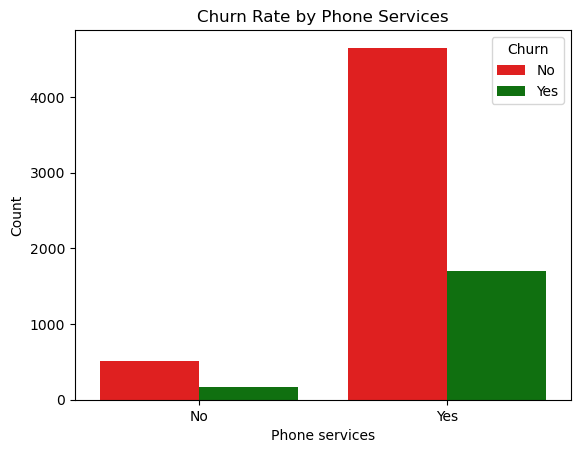

In [258]:
#Create bar chart for Phone servies and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PhoneService", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Phone Services")
plt.xlabel("Phone services")
plt.ylabel("Count")
plt.show()

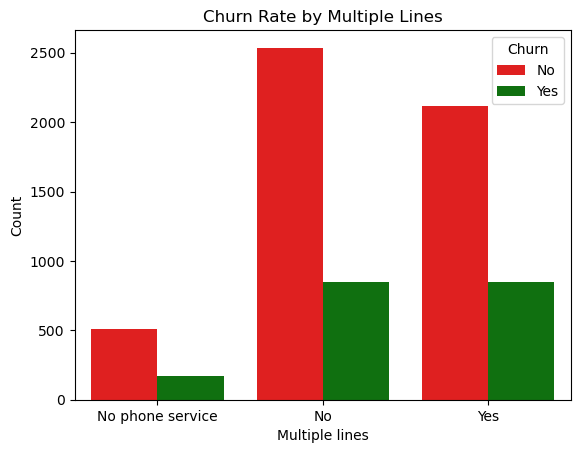

In [259]:
#Create bar chart for Multiple lines and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "MultipleLines", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Multiple Lines")
plt.xlabel("Multiple lines")
plt.ylabel("Count")
plt.show()

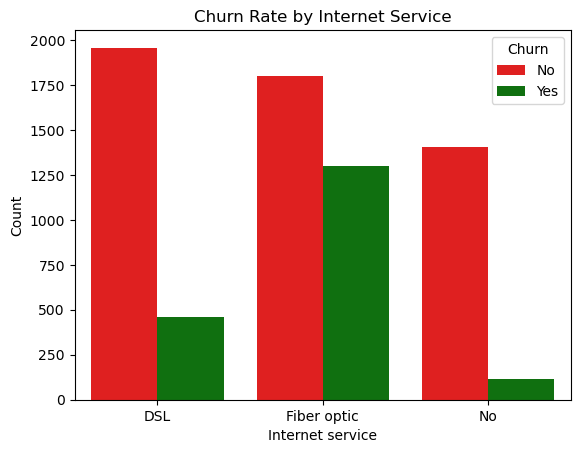

In [260]:
#Create bar chart for Internet service and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "InternetService", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Internet Service")
plt.xlabel("Internet service")
plt.ylabel("Count")
plt.show()

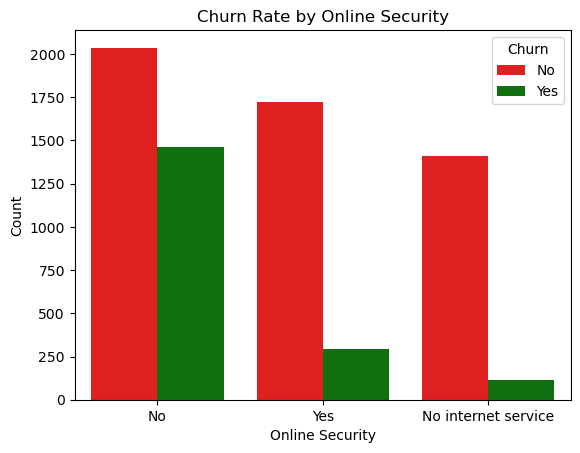

In [261]:
#Create bar chart for Online security and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "OnlineSecurity", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

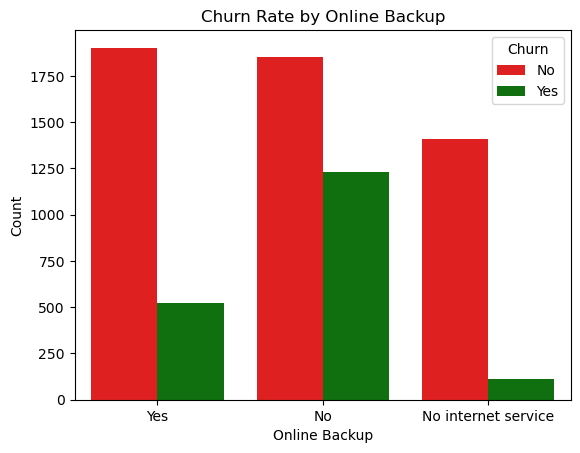

In [262]:
#Create bar chart for Online backup and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "OnlineBackup", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.show()

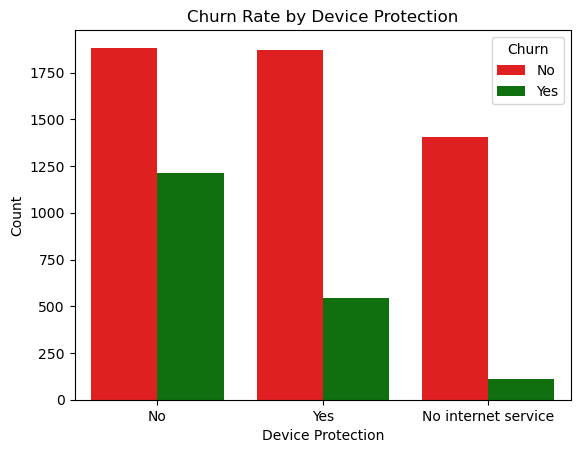

In [263]:
#Create bar chart for Device Protection and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "DeviceProtection", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Device Protection")
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.show()

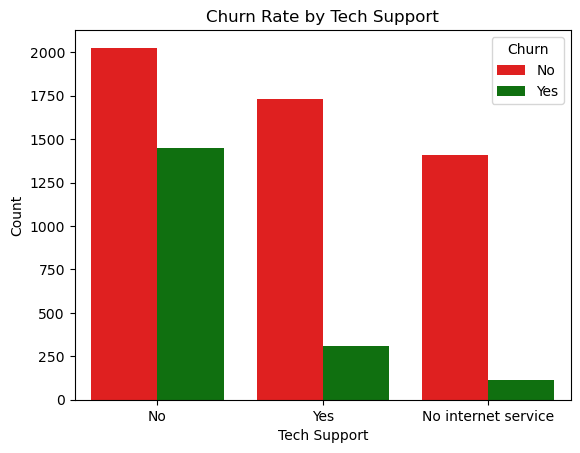

In [264]:
#Create bar chart for Tech support and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "TechSupport", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

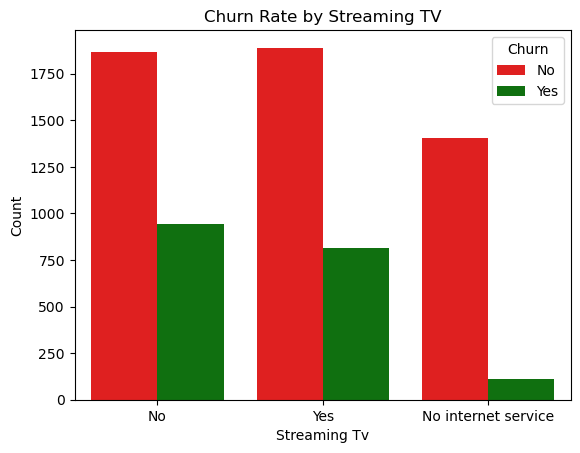

In [265]:
#Create bar chart for Streaming Tv and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "StreamingTV", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Streaming TV")
plt.xlabel("Streaming Tv")
plt.ylabel("Count")
plt.show()

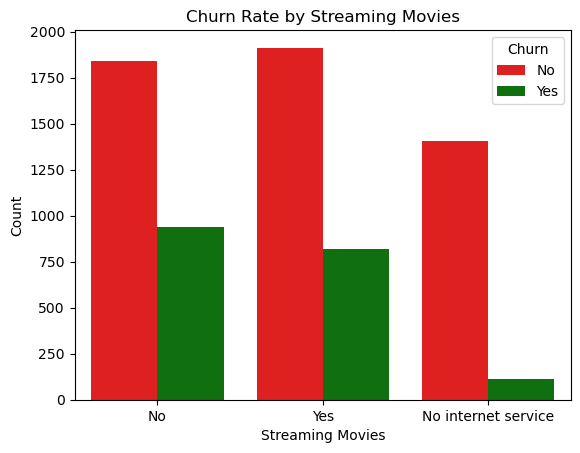

In [266]:
#Create bar chart for Streaming Movies and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "StreamingMovies", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Streaming Movies")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

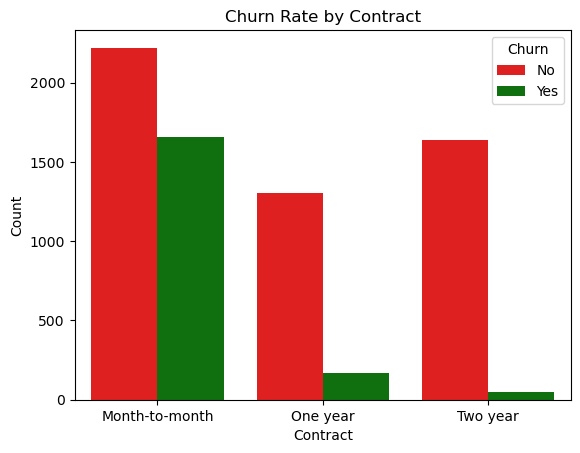

In [267]:
#Create bar chart for seniorCitizen and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Contract", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.show()

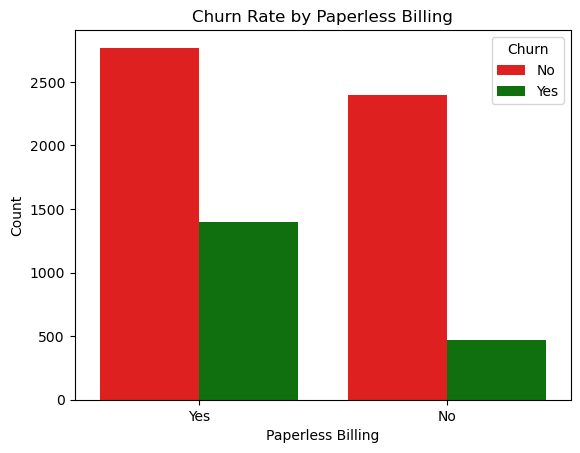

In [268]:
#Create bar chart for Paperless Billing and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PaperlessBilling", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.show()

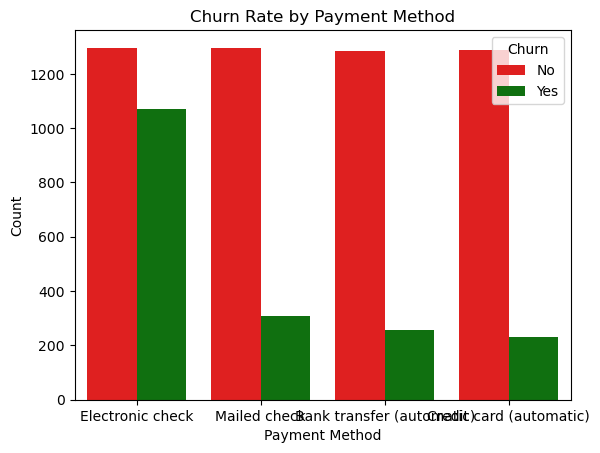

In [269]:
#Create bar chart for Payment Method and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PaymentMethod", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

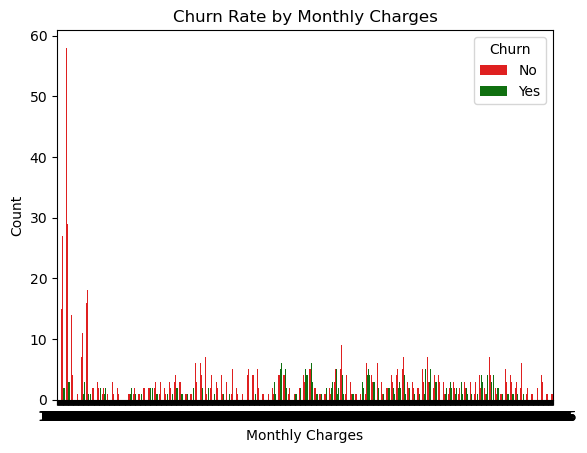

In [270]:
#Create bar chart for Monthly Charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "MonthlyCharges", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

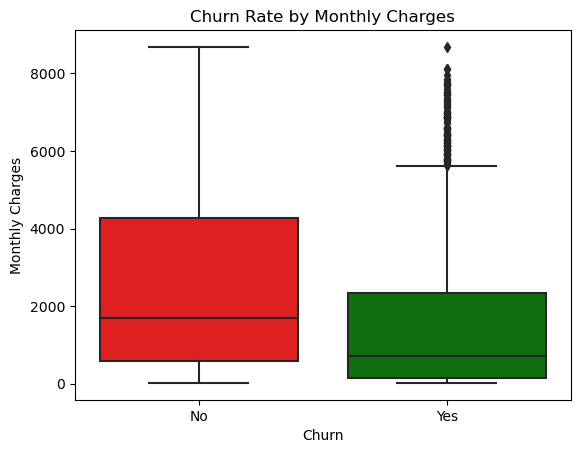

In [271]:
#Create bar chart for Monthly Charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "TotalCharges", data = data, palette = custom_palette)

plt.title("Churn Rate by Monthly Charges")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

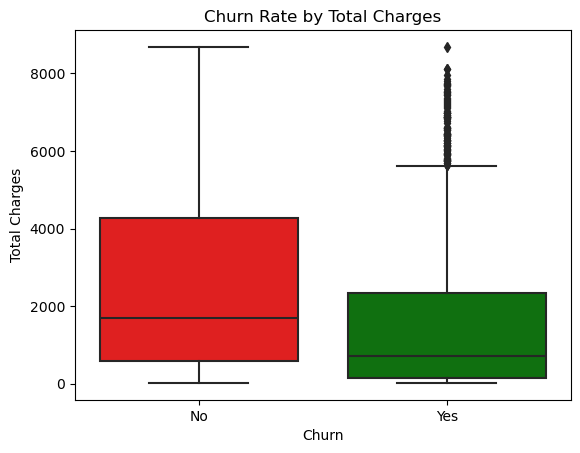

In [272]:
#Create bar chart for Total charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "TotalCharges", data = data, palette = custom_palette)

plt.title("Churn Rate by Total Charges")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

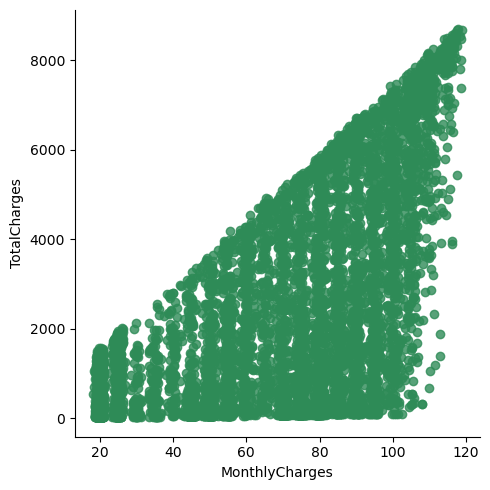

In [273]:
#Relationship between monthly charges and total charges

sns.lmplot(data=data, x='MonthlyCharges', y='TotalCharges', fit_reg=False, 
           scatter_kws={'color': 'seagreen'})
plt.tight_layout()
plt.show()

#As expected as monthly charges increases so does total

/Users/jadey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jadey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly charges by churn')

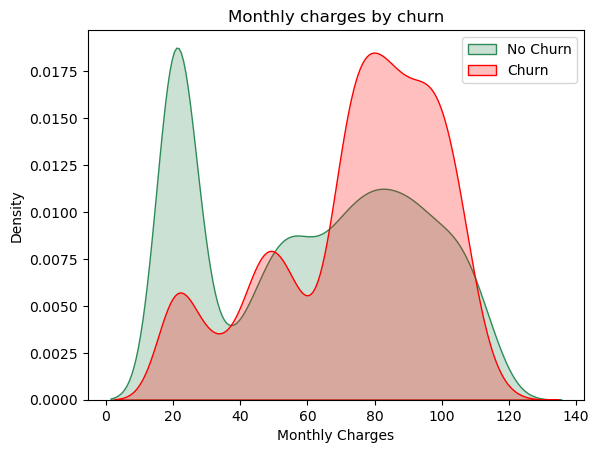

In [274]:
#Churn for monthly charges and total charges

churn_month_total = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="seagreen", fill = True)
churn_month_total = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =churn_month_total, color="Red", fill= True)
churn_month_total.legend(["No Churn","Churn"],loc='upper right')
churn_month_total.set_ylabel('Density')
churn_month_total.set_xlabel('Monthly Charges')
churn_month_total.set_title('Monthly charges by churn')

#When monthly charges are high, churn is high

/Users/jadey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jadey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


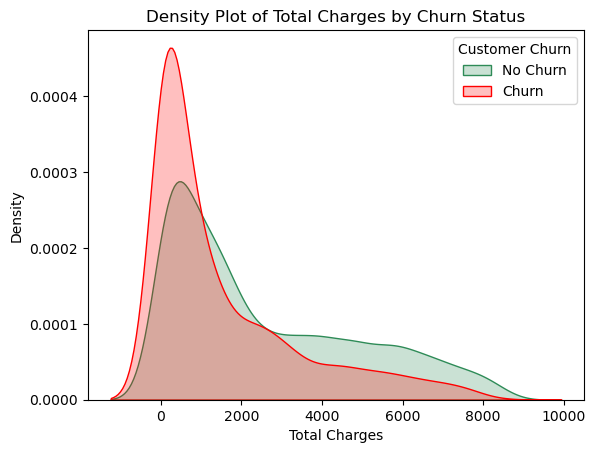

In [275]:
sns.kdeplot(data=data[data["Churn"] == 'No']['TotalCharges'], color="seagreen", fill=True, label="No Churn")

sns.kdeplot(data=data[data["Churn"] == 'Yes']['TotalCharges'], color="red", fill=True, label="Churn")

plt.legend(title='Customer Churn')
plt.title('Density Plot of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Display the plot
plt.show()

#Surprisingly churn was higher when total charges were lower because its linked to tenure

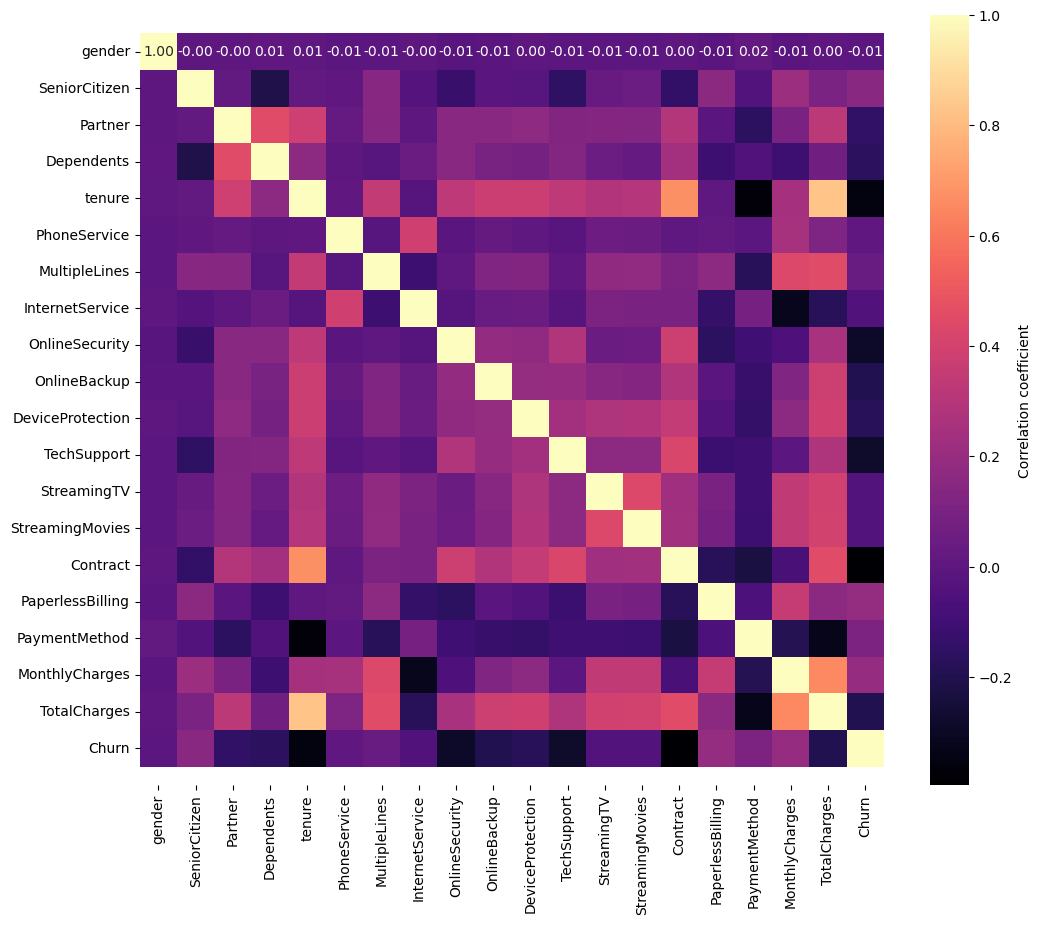

In [276]:
#ADDITIONAL

#Create Heat Map
#Correlations

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
              'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
              'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for column in data.columns:
    if data[column].dtype == 'object':
        data[column]= pd.Categorical(data[column]).codes
        
corr = data[categories].corr()
plt.figure(figsize =(12,10))

sns.heatmap(corr, annot = True, fmt =".2f", cmap='magma', 
            cbar_kws={'label': 'Correlation coefficient'})
plt.ylim(len(corr)+0.5, -0.5)
plt.show()

In [277]:
corr[['Churn']].sort_values(by='Churn')


,Churn
Contract,-0.396150
tenure,-0.354049
OnlineSecurity,-0.289050
TechSupport,-0.282232
TotalCharges,-0.199484
OnlineBackup,-0.195290
DeviceProtection,-0.177883
Dependents,-0.163128
Partner,-0.149982
InternetService,-0.047097


In [278]:
#If we compare tenure, monthly charges and total charges, 
#we can see when monthly charges are higher at low tenure this results at lower total charge
#high monthly charge, lower tenure and lower total charge are linked to high churn
#from heat map - month to month xontracts, no online security, no tech support, first year of subscription and fibre optics are linked to high churn

#low churn is seen in longterm contracts, packages without internetservice and customers
#longer than 5 years

#gender, phone service and no of multiple lines have no impact on chutn 

In [279]:
#Relationship between monthly charges and total charges
#We expect when monthly charges are high total charges are high 

#sns.lmplot(data=data_encoding, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [280]:
#Machine Learning Techniques

In [282]:
#Create test and train datasets
#Assigns columns to x apart from churn
#assign churn column to y 

In [283]:
x = data.drop(['Churn'], axis = 1)
y = data['Churn']

data_encoded = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data_encoded.fit_transform(data[column])

y = data_encoded.fit_transform(y)

In [284]:
#Split training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [285]:
#DecisionTree Classifier


dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree = dec_tree.fit(x_train, y_train)

In [286]:
y_predict = dec_tree.predict(x_test)


In [287]:
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_predict))

Accuracy: 0.7249466950959488
Confusion Matrix:
 [[826 207]
 [180 194]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



In [288]:
#Area under curve

y_scores = dec_tree.predict_proba(x_test)[:, 1]

In [289]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

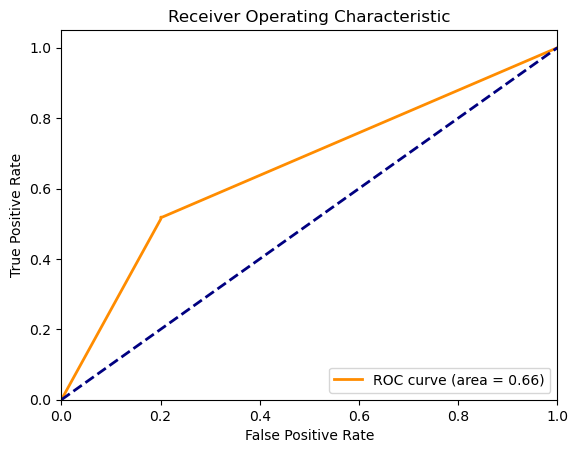

AUC-ROC: 0.657930020551739


In [290]:
#1 represents perfect, 0.5 random guess

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC-ROC:", roc_auc)

In [291]:
#Naive bayes 

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [292]:
y_predict = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy: 0.7391613361762616
Confusion Matrix:
 [[767 266]
 [101 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [293]:
#Area under the curve
y_probs = model.predict_proba(x_test)[:, 1]

In [294]:
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8130878858627848


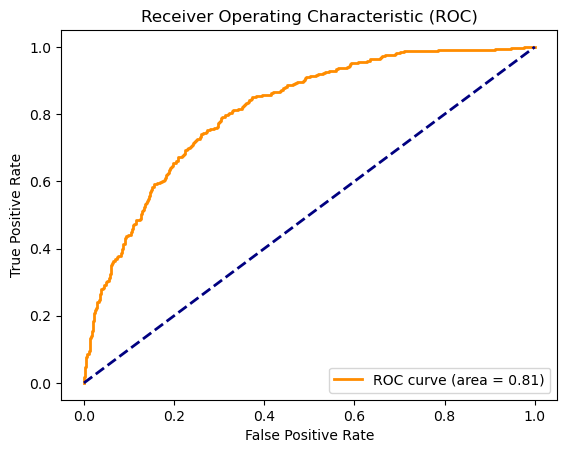

In [295]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [296]:
#Logistic Regression

log_reg = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
log_reg.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [297]:
#prediction

y_predict = log_reg.predict(x_test)
y_probs = log_reg.predict_proba(x_test)[:, 1]

In [298]:
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Accuracy:", accuracy_score(y_test, y_predict))
# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7874911158493249
Confusion Matrix:
 [[912 121]
 [178 196]]
ROC AUC Score: 0.8295939866750184


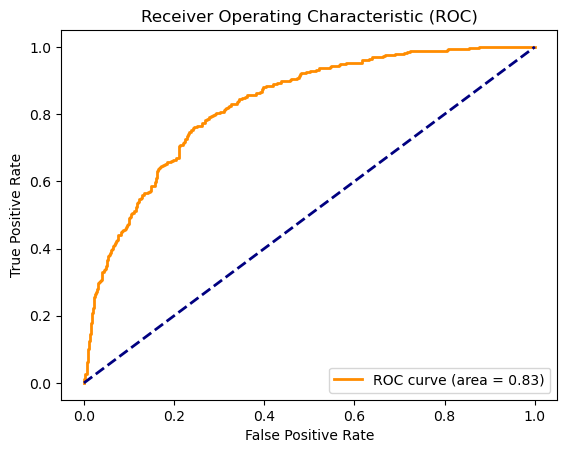

In [299]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [300]:
#RFM MODELS 

In [301]:
#Recency Score
#A lower score means more recent activity - lower tenure is considered more recent
data['RecencyScore'] = pd.qcut(data['tenure'].rank(method='first'), 5, labels=[5,4,3,2,1])


In [302]:
#Frequency Score
#A higher score means more services used, implying more frequent engangement
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies']
data['ServiceCount'] = data[services_columns].apply(lambda x: x == 'Yes').sum(axis=1)
data['FrequencyScore'] = pd.qcut(data['ServiceCount'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [303]:
#Monetary Score
#A higher score means higher total charges, implying higher monetary value
data['MonetaryScore'] = pd.qcut(data['TotalCharges'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])


In [304]:
data['RFM_Score'] = data['RecencyScore'].astype(str) + data['FrequencyScore'].astype(str) + data['MonetaryScore'].astype(str)
churnCol = data['Churn']
churnCol.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [305]:
# Group by RFM_Score to aggregate churn information
segment_churn = data.groupby('RFM_Score')['Churn'].agg(['sum', 'count']).reset_index()

# Calculate the churn rate for each segment
segment_churn['ChurnRate'] = segment_churn['sum'] / segment_churn['count']

# Sort by churn rate for better visibility
segment_churn.sort_values(by='ChurnRate', ascending=False, inplace=True)

# Display the DataFrame
segment_churn.head(10)  # Show the top 10 segments with the highest churn rate


,RFM_Score,sum,count,ChurnRate
73,542,22,29,0.758621
71,532,35,52,0.673077
67,512,33,51,0.647059
75,552,23,37,0.621622
56,423,47,79,0.594937
74,551,135,237,0.569620
72,541,123,220,0.559091
69,522,23,43,0.534884
52,413,49,95,0.515789
66,511,124,242,0.512397


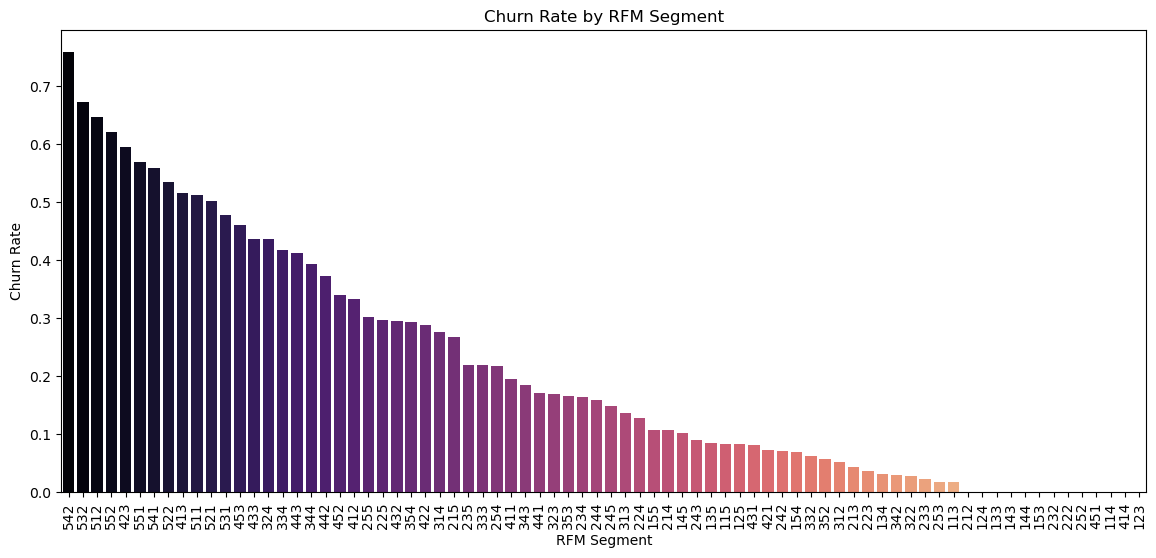

In [306]:

plt.figure(figsize=(14, 6))
sns.barplot(x='RFM_Score', y='ChurnRate', data=segment_churn.sort_values('ChurnRate', ascending=False), palette='magma')
plt.title('Churn Rate by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()


In [307]:
#Evaluate predictive performance of the RFM model by setting a threshold for high risk segments 
#Use the 75th percentile of churn rates as threshold for high risk segments, then label accordingly
#0 is did not churn , 1 is churned

#To understand accuracy of RFM model use threshold for high risk segment and calculate metrics such as precision and recall. 
#segmentation method not predictive model 

# Calculate the threshold for high risk (75th percentile of churn rates)
high_risk_threshold = segment_churn['ChurnRate'].quantile(0.75)

# Create a new column in the original dataframe that marks each customer as high risk or not
data['HighRisk'] = data['RFM_Score'].apply(
    lambda x: 1 if segment_churn[segment_churn['RFM_Score'] == x]['ChurnRate'].values[0] > high_risk_threshold else 0
)

# Now we have our predicted labels in 'HighRisk' and actual labels in 'ChurnBinary'
# Let's calculate the classification report which includes precision, recall, and F1 score
classification_report_metrics = classification_report(data['Churn'], data['HighRisk'], output_dict=True)

# Convert classification report to DataFrame for better display
classification_report_df = pd.DataFrame(classification_report_metrics).transpose()

classification_report_df


,precision,recall,f1-score,support
0,0.850991,0.773194,0.810229,5163.000000
1,0.499786,0.626003,0.555819,1869.000000
accuracy,0.734073,0.734073,0.734073,0.734073
macro avg,0.675389,0.699599,0.683024,7032.000000
weighted avg,0.757646,0.734073,0.742611,7032.000000


In [308]:
#Segment customers





# Convert RFM scores to integer data type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)





def rfm_segment(row):
    if row['RecencyScore'] == 5 and row['FrequencyScore'] == 5 and row ['MonetaryScore'] == 5:
        return 'High Value'
    elif row['FrequencyScore'] >= 4:
        return 'Loyal Customers'
    elif row['MonetaryScore'] >= 4:
        return 'Big Spenders'
    elif row['RecencyScore'] <= 2 and row['FrequencyScore'] >= 4 and row['MonetaryScore'] >=4:
        return 'At Risk'
    elif row['RecencyScore'] == 1 and row ['FrequencyScore'] and row ['MonetaryScore'] == 1:
        return 'Low Spend Inactive'
    #else: 
       # return 'Others'
    
data['Segment'] = data.apply(rfm_segment, axis =1)
#print(data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,RecencyScore,ServiceCount,FrequencyScore,MonetaryScore,RFM_Score,HighRisk,Segment
0,0,0,1,0,1,0,1,0,0,2,...,29.85,29.85,0,5,0,1,1,511,1,None
1,1,0,0,0,34,1,0,0,2,0,...,56.95,1889.50,0,3,0,1,3,313,0,None
2,1,0,0,0,2,1,0,0,2,2,...,53.85,108.15,1,5,0,1,1,511,1,None
3,1,0,0,0,45,0,1,0,2,0,...,42.30,1840.75,0,2,0,1,3,213,0,None
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,5,0,1,1,511,1,None


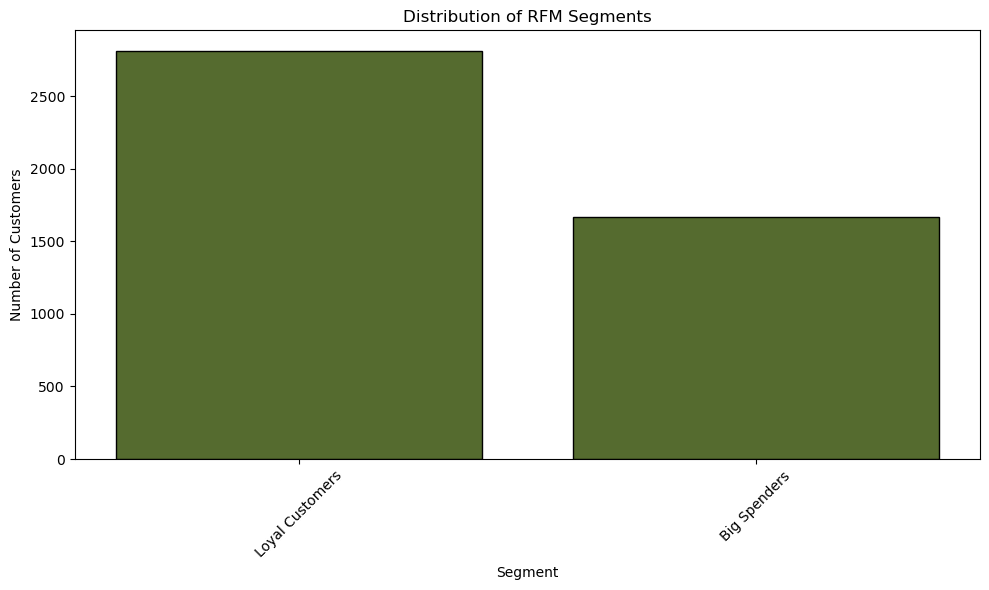

In [309]:
#Plot data 

segment_counts = data['Segment'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(segment_counts.index, segment_counts.values, color = 'darkolivegreen', edgecolor = 'black')
plt.title('Distribution of RFM Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate the x-axis labels to make them more readable
plt.tight_layout()  # Adjust layout
plt.show()

In [185]:
high_value_customers = data[(data['RecencyScore'] == 5) & (data['FrequencyScore'] == 5) & (data['MonetaryScore'] == 5)]
print(len(high_value_customers))

0
